# Deep Learning Methods for Medical Image Analysis (CM2003)

# Laboratory Assignment 4: Part 3 - Segmentation Task

Lab Group 8:
- Gnana Spandana Akumalla
- Patrik Svensson
- Serkan Arda Yilal

In [45]:
# Import the required libraries
import os
import tensorflow as tf
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D, Activation, BatchNormalization, Input
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Conv2D, Conv2DTranspose, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from Utils import loss_dice_plot, load_data, load_image, load_mask, create_generator, image_mask_generator, dice_coef
from Utils import dice_coef_loss, train_unet
from Models import conv_block, get_unet


### Task4a)

In this task, we train u-net with specified settings according to lab 4 document.

In [22]:
# Define Constants and Paths
base= 8
img_width, img_heigth= 256, 256
batch_size = 8
learning_rate = 0.0001
epochs = 150
dropout = None
batchnorm = False
loss = "binary_crossentropy"
metrics = [dice_coef]
verbose = 1

# Paths 
data_dir = 'Data/DL_course/Lab3/X_ray/'
image_dir = os.path.join(data_dir, 'Image/')
mask_dir = os.path.join(data_dir, 'Mask/')

# Load and preprocess images and masks
images, masks = load_data(data_dir, image_dir, mask_dir, img_width, img_heigth)

x_train, x_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)
# Convert lists to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

# Ensure that the shape of the data matches the model's input shape
x_train = x_train.reshape((-1, img_width, img_heigth, 1))
y_train = y_train.reshape((-1, img_width, img_heigth, 1))
x_val = x_val.reshape((-1, img_width, img_heigth, 1))
y_val = y_val.reshape((-1, img_width, img_heigth, 1))


# Create and compile the U-Net model

model = get_unet(input_shape=(img_width, img_heigth, 1), base = base, batchnorm=batchnorm, dropout = dropout)

model, history = train_unet(model, x_train, y_train, x_val, y_val, batch_size, epochs, learning_rate,
               metrics, verbose = verbose,
               loss = loss)



Epoch 1/150
24/24 [==============================] - 3s 47ms/step - loss: 0.6919 - dice_coef: 0.3793 - val_loss: 0.6906 - val_dice_coef: 0.3755
Epoch 2/150
24/24 [==============================] - 1s 28ms/step - loss: 0.6891 - dice_coef: 0.3780 - val_loss: 0.6870 - val_dice_coef: 0.3741
Epoch 3/150
24/24 [==============================] - 1s 28ms/step - loss: 0.6843 - dice_coef: 0.3758 - val_loss: 0.6797 - val_dice_coef: 0.3710
Epoch 4/150
24/24 [==============================] - 1s 28ms/step - loss: 0.6701 - dice_coef: 0.3704 - val_loss: 0.6455 - val_dice_coef: 0.3637
Epoch 5/150
24/24 [==============================] - 1s 28ms/step - loss: 0.5310 - dice_coef: 0.4038 - val_loss: 0.3900 - val_dice_coef: 0.4897
Epoch 6/150
24/24 [==============================] - 1s 28ms/step - loss: 0.3741 - dice_coef: 0.5178 - val_loss: 0.3411 - val_dice_coef: 0.5453
Epoch 7/150
24/24 [==============================] - 1s 28ms/step - loss: 0.3376 - dice_coef: 0.5501 - val_loss: 0.3224 - val_dice_coef:

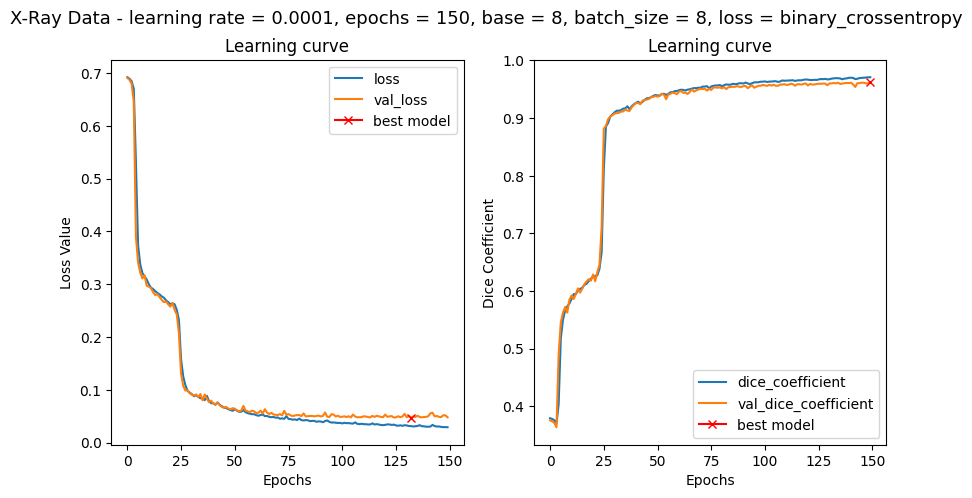

In [23]:
loss_dice_plot(history, "X-Ray Data - learning rate = {}, epochs = {}, base = {}, batch_size = {}, loss = {}".format(learning_rate, epochs,
                                                                                                base,batch_size, loss))

### Task4b)

In this task, we keep all setting in previous task except changing loss value from BCE to dice coefficient loss.

In [25]:
loss = [dice_coef_loss]
# Create and compile the U-Net model

model_dice = get_unet(input_shape=(img_width, img_heigth, 1), base = base, batchnorm=batchnorm, dropout = dropout)

model_dice, history_dice = train_unet(model_dice, x_train, y_train, x_val, y_val, batch_size, epochs, learning_rate,
               metrics, verbose = verbose,
               loss = loss)

Epoch 1/150
24/24 [==============================] - 3s 47ms/step - loss: -0.3822 - dice_coef: 0.3824 - val_loss: -0.3796 - val_dice_coef: 0.3802
Epoch 2/150
24/24 [==============================] - 1s 27ms/step - loss: -0.3857 - dice_coef: 0.3859 - val_loss: -0.3842 - val_dice_coef: 0.3848
Epoch 3/150
24/24 [==============================] - 1s 27ms/step - loss: -0.3915 - dice_coef: 0.3916 - val_loss: -0.3916 - val_dice_coef: 0.3922
Epoch 4/150
24/24 [==============================] - 1s 27ms/step - loss: -0.4011 - dice_coef: 0.4010 - val_loss: -0.4037 - val_dice_coef: 0.4044
Epoch 5/150
24/24 [==============================] - 1s 26ms/step - loss: -0.4166 - dice_coef: 0.4179 - val_loss: -0.4235 - val_dice_coef: 0.4241
Epoch 6/150
24/24 [==============================] - 1s 27ms/step - loss: -0.4461 - dice_coef: 0.4471 - val_loss: -0.4675 - val_dice_coef: 0.4682
Epoch 7/150
24/24 [==============================] - 1s 27ms/step - loss: -0.5934 - dice_coef: 0.5978 - val_loss: -0.8168 - 

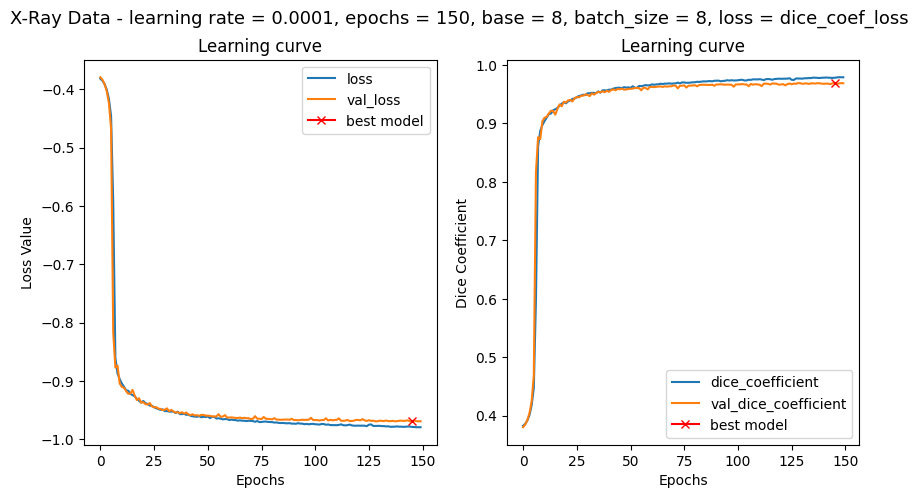

In [26]:
loss_dice_plot(history_dice, "X-Ray Data - learning rate = {}, epochs = {}, base = {}, batch_size = {}, loss = dice_coef_loss".format(learning_rate, epochs,
                                                                                                base,batch_size))

### Task4c)

In this task, we will repeat 4a and 4b by including a dropout rate of 0.2.

#### U-net with BCE and dropout = 0.2

In [27]:
dropout = 0.2
loss = "binary_crossentropy"

model_drop = get_unet(input_shape=(img_width, img_heigth, 1), base = base, batchnorm=batchnorm, dropout = dropout)

model_drop, history_drop = train_unet(model_drop, x_train, y_train, x_val, y_val, batch_size, epochs, learning_rate,
               metrics, verbose = verbose,
               loss = loss)


Epoch 1/150
24/24 [==============================] - 3s 50ms/step - loss: 0.6978 - dice_coef: 0.3869 - val_loss: 0.6943 - val_dice_coef: 0.3808
Epoch 2/150
24/24 [==============================] - 1s 30ms/step - loss: 0.6936 - dice_coef: 0.3813 - val_loss: 0.6920 - val_dice_coef: 0.3782
Epoch 3/150
24/24 [==============================] - 1s 31ms/step - loss: 0.6918 - dice_coef: 0.3809 - val_loss: 0.6907 - val_dice_coef: 0.3767
Epoch 4/150
24/24 [==============================] - 1s 31ms/step - loss: 0.6903 - dice_coef: 0.3797 - val_loss: 0.6892 - val_dice_coef: 0.3755
Epoch 5/150
24/24 [==============================] - 1s 31ms/step - loss: 0.6885 - dice_coef: 0.3796 - val_loss: 0.6868 - val_dice_coef: 0.3738
Epoch 6/150
24/24 [==============================] - 1s 31ms/step - loss: 0.6789 - dice_coef: 0.3791 - val_loss: 0.6419 - val_dice_coef: 0.3874
Epoch 7/150
24/24 [==============================] - 1s 32ms/step - loss: 0.4562 - dice_coef: 0.5166 - val_loss: 0.4664 - val_dice_coef:

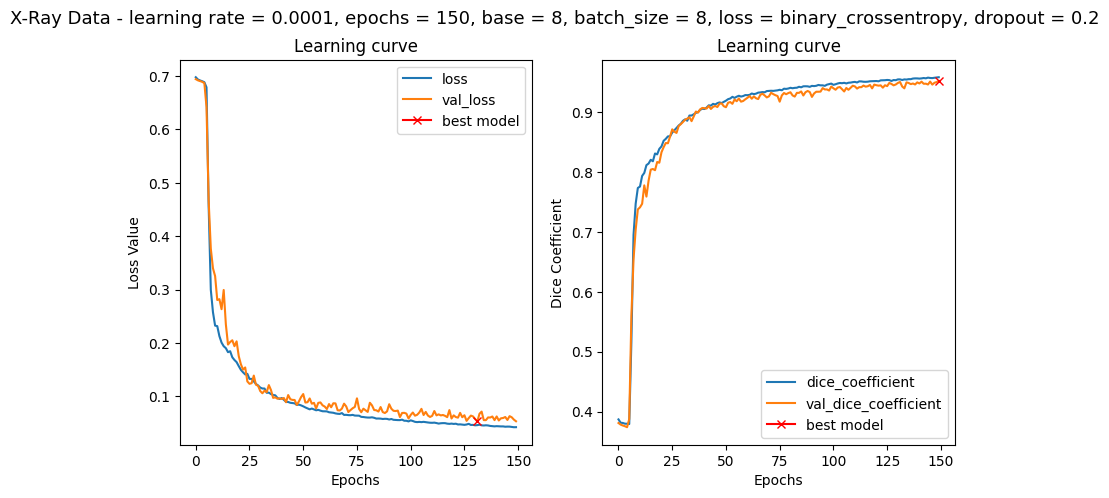

In [32]:
loss_dice_plot(history_drop, "X-Ray Data - learning rate = {}, epochs = {}, base = {}, batch_size = {}, loss = {}, dropout = {}".format(learning_rate, epochs,
                                                                                                base,batch_size, loss, dropout))

#### U-net with dice coeffiicent loss and dropout = 0.2

In [33]:
loss = [dice_coef_loss]

model_dice_drop = get_unet(input_shape=(img_width, img_heigth, 1), base = base, batchnorm=batchnorm, dropout = dropout)

model_dice_drop, history_dice_drop = train_unet(model_dice_drop, x_train, y_train, x_val, y_val, batch_size, epochs, 
                                                learning_rate,
                                               metrics, verbose = verbose,
                                               loss = loss)

Epoch 1/150
24/24 [==============================] - 3s 47ms/step - loss: -0.3821 - dice_coef: 0.3829 - val_loss: -0.3787 - val_dice_coef: 0.3793
Epoch 2/150
24/24 [==============================] - 1s 28ms/step - loss: -0.3860 - dice_coef: 0.3867 - val_loss: -0.3865 - val_dice_coef: 0.3871
Epoch 3/150
24/24 [==============================] - 1s 28ms/step - loss: -0.4278 - dice_coef: 0.4281 - val_loss: -0.4757 - val_dice_coef: 0.4766
Epoch 4/150
24/24 [==============================] - 1s 29ms/step - loss: -0.4806 - dice_coef: 0.4817 - val_loss: -0.4779 - val_dice_coef: 0.4787
Epoch 5/150
24/24 [==============================] - 1s 29ms/step - loss: -0.5003 - dice_coef: 0.5003 - val_loss: -0.5267 - val_dice_coef: 0.5276
Epoch 6/150
24/24 [==============================] - 1s 29ms/step - loss: -0.5455 - dice_coef: 0.5467 - val_loss: -0.5595 - val_dice_coef: 0.5603
Epoch 7/150
24/24 [==============================] - 1s 29ms/step - loss: -0.5771 - dice_coef: 0.5775 - val_loss: -0.5758 - 

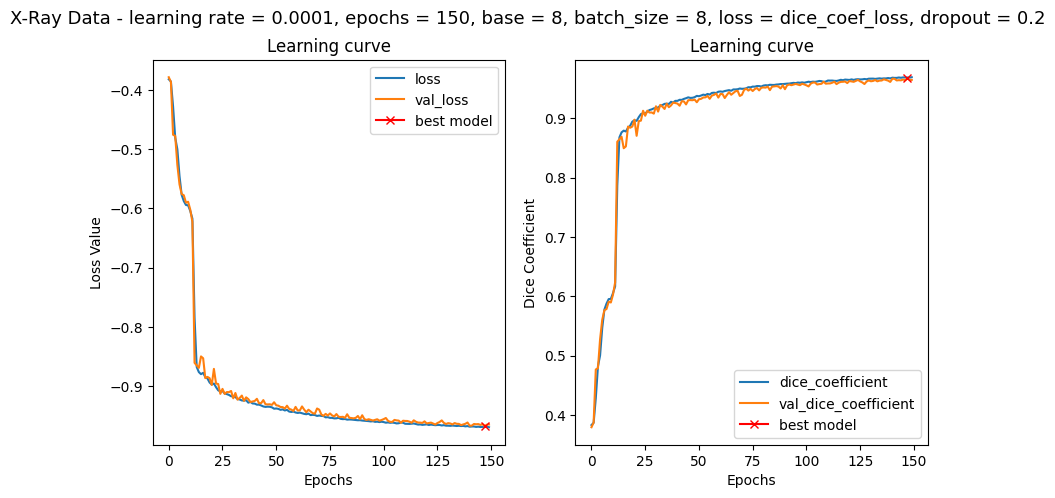

In [34]:
loss_dice_plot(history_dice_drop, "X-Ray Data - learning rate = {}, epochs = {}, base = {}, batch_size = {}, loss = dice_coef_loss, dropout = {}".format(learning_rate, epochs,
                                                                                                base,batch_size, dropout))

### Task4d)

In this task, we will repeat Task4c) by setting base = 32 instead of base = 8.

#### U-net with BCE and dropout = 0.2, base = 32

In [35]:
dropout = 0.2
loss = "binary_crossentropy"
base= 32

model_drop = get_unet(input_shape=(img_width, img_heigth, 1), base = base, batchnorm=batchnorm, dropout = dropout)

model_drop, history_drop = train_unet(model_drop, x_train, y_train, x_val, y_val, batch_size, epochs, learning_rate,
               metrics, verbose = verbose,
               loss = loss)

Epoch 1/150
24/24 [==============================] - 7s 174ms/step - loss: 0.6870 - dice_coef: 0.3726 - val_loss: 0.6736 - val_dice_coef: 0.3497
Epoch 2/150
24/24 [==============================] - 2s 101ms/step - loss: 0.5951 - dice_coef: 0.3587 - val_loss: 0.5617 - val_dice_coef: 0.3916
Epoch 3/150
24/24 [==============================] - 2s 102ms/step - loss: 0.4386 - dice_coef: 0.4731 - val_loss: 0.3626 - val_dice_coef: 0.5158
Epoch 4/150
24/24 [==============================] - 2s 102ms/step - loss: 0.3381 - dice_coef: 0.5560 - val_loss: 0.3211 - val_dice_coef: 0.5633
Epoch 5/150
24/24 [==============================] - 3s 106ms/step - loss: 0.2633 - dice_coef: 0.6955 - val_loss: 0.1908 - val_dice_coef: 0.8030
Epoch 6/150
24/24 [==============================] - 3s 108ms/step - loss: 0.1994 - dice_coef: 0.8092 - val_loss: 0.1852 - val_dice_coef: 0.7997
Epoch 7/150
24/24 [==============================] - 3s 107ms/step - loss: 0.1689 - dice_coef: 0.8397 - val_loss: 0.1649 - val_dic

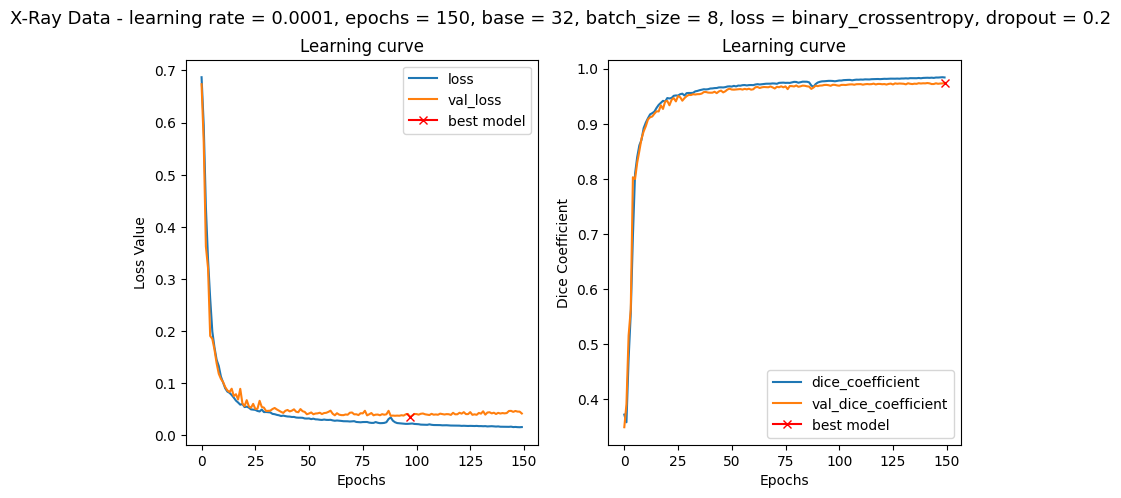

In [36]:
loss_dice_plot(history_drop, "X-Ray Data - learning rate = {}, epochs = {}, base = {}, batch_size = {}, loss = {}, dropout = {}".format(learning_rate, epochs,
                                                                                                base,batch_size, loss, dropout))

#### U-net with dice coeffiicent loss and dropout = 0.2, base = 32

In [37]:
loss = [dice_coef_loss]

model_dice_drop = get_unet(input_shape=(img_width, img_heigth, 1), base = base, batchnorm=batchnorm, dropout = dropout)

model_dice_drop, history_dice_drop = train_unet(model_dice_drop, x_train, y_train, x_val, y_val, batch_size, epochs, 
                                                learning_rate,
                                               metrics, verbose = verbose,
                                               loss = loss)

Epoch 1/150
24/24 [==============================] - 5s 118ms/step - loss: -0.3817 - dice_coef: 0.3818 - val_loss: -0.3872 - val_dice_coef: 0.3879
Epoch 2/150
24/24 [==============================] - 2s 101ms/step - loss: -0.4554 - dice_coef: 0.4568 - val_loss: -0.4940 - val_dice_coef: 0.4948
Epoch 3/150
24/24 [==============================] - 2s 102ms/step - loss: -0.5138 - dice_coef: 0.5157 - val_loss: -0.5394 - val_dice_coef: 0.5404
Epoch 4/150
24/24 [==============================] - 2s 102ms/step - loss: -0.6602 - dice_coef: 0.6663 - val_loss: -0.7682 - val_dice_coef: 0.7683
Epoch 5/150
24/24 [==============================] - 2s 101ms/step - loss: -0.8484 - dice_coef: 0.8469 - val_loss: -0.8744 - val_dice_coef: 0.8741
Epoch 6/150
24/24 [==============================] - 2s 101ms/step - loss: -0.8762 - dice_coef: 0.8769 - val_loss: -0.8649 - val_dice_coef: 0.8645
Epoch 7/150
24/24 [==============================] - 2s 101ms/step - loss: -0.8906 - dice_coef: 0.8907 - val_loss: -0.

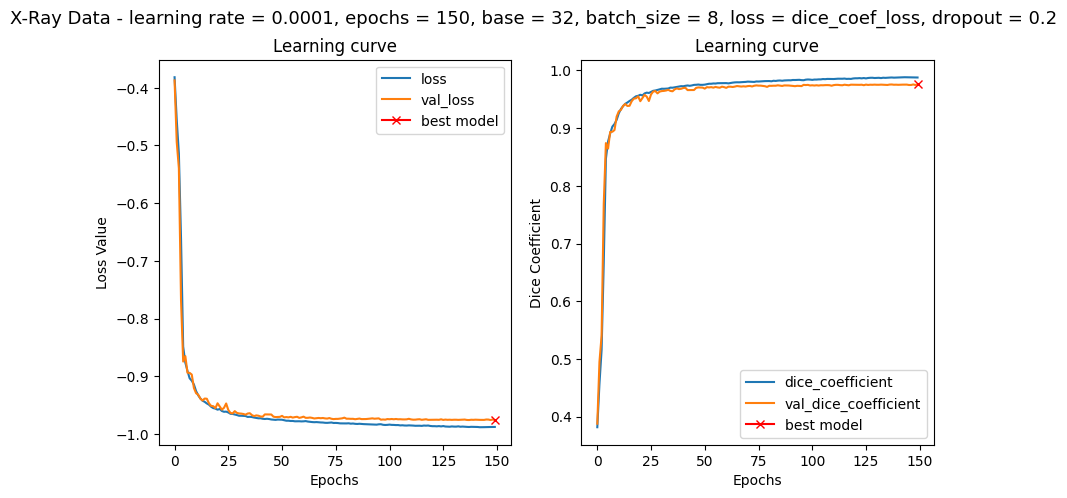

In [38]:
loss_dice_plot(history_dice_drop, "X-Ray Data - learning rate = {}, epochs = {}, base = {}, batch_size = {}, loss = dice_coef_loss, dropout = {}".format(learning_rate, epochs,
                                                                                                base,batch_size, dropout))

### Task4e)

In this task, we repeath the things we did in task4c) with base = 16, batch normalization = True and train the models by applying augmentation technique on both images and masks with:
- rotation range = 10
- width shift ranges = 0.1
- height shift ranges = 0.1
- zoom range = 0.2
- horizontal flip = true

#### U-net with BCE and dropout = 0.2, base = 16, batch normalization = True, Data Augmentation = True

In [40]:
generator = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True
    )

dropout = 0.2
loss = "binary_crossentropy"
base= 16
batchnorm = True

model_drop_aug = get_unet(input_shape=(img_width, img_heigth, 1), base = base, batchnorm=batchnorm, dropout = dropout)

model_drop_aug, history_drop_aug = train_unet(model_drop_aug, x_train, y_train, x_val, y_val, batch_size, epochs, learning_rate,
               metrics, verbose = verbose,
               loss = loss,  generator = generator)

Epoch 1/150


<ipython-input-39-c8379ec102aa>:162: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_image_mask_generator,steps_per_epoch = step_size_train,


23/23 [==============================] - 7s 139ms/step - loss: 0.6440 - dice_coef: 0.3875 - val_loss: 0.6903 - val_dice_coef: 0.3689
Epoch 2/150
23/23 [==============================] - 3s 115ms/step - loss: 0.6066 - dice_coef: 0.4021 - val_loss: 0.6965 - val_dice_coef: 0.3806
Epoch 3/150
23/23 [==============================] - 3s 117ms/step - loss: 0.5813 - dice_coef: 0.4119 - val_loss: 0.7210 - val_dice_coef: 0.3813
Epoch 4/150
23/23 [==============================] - 3s 119ms/step - loss: 0.5411 - dice_coef: 0.4454 - val_loss: 0.7062 - val_dice_coef: 0.4104
Epoch 5/150
23/23 [==============================] - 3s 114ms/step - loss: 0.5294 - dice_coef: 0.4684 - val_loss: 0.6944 - val_dice_coef: 0.4163
Epoch 6/150
23/23 [==============================] - 3s 118ms/step - loss: 0.5075 - dice_coef: 0.4785 - val_loss: 0.6292 - val_dice_coef: 0.3997
Epoch 7/150
23/23 [==============================] - 3s 118ms/step - loss: 0.5069 - dice_coef: 0.4893 - val_loss: 0.5776 - val_dice_coef: 0.37

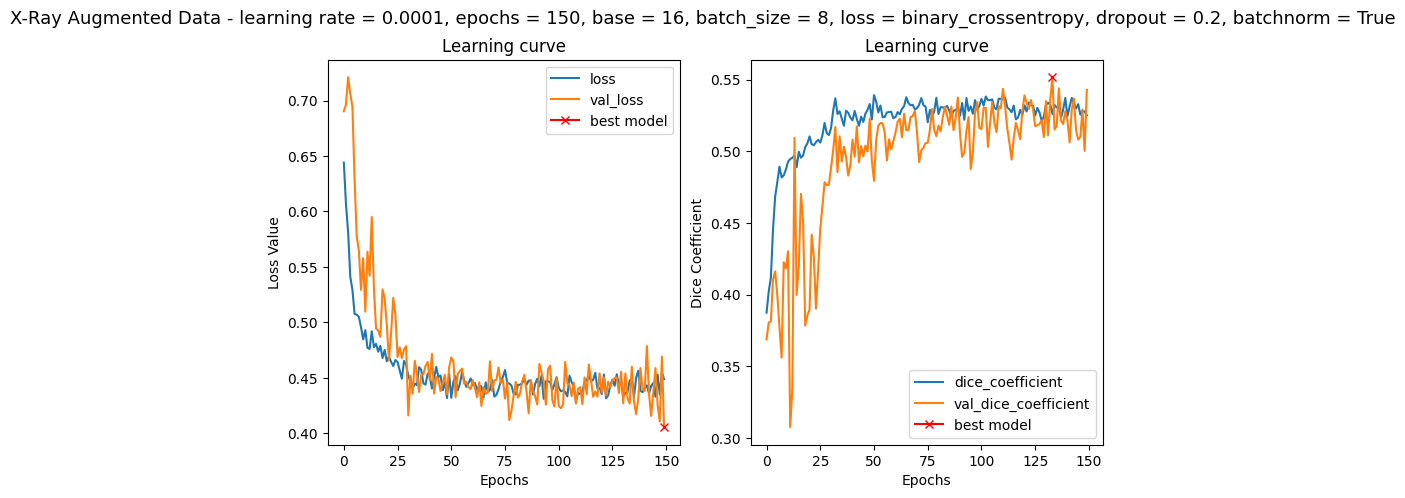

In [41]:
loss_dice_plot(history_drop_aug, "X-Ray Augmented Data - learning rate = {}, epochs = {}, base = {}, batch_size = {}, loss = {}, dropout = {}, batchnorm = {}".format(learning_rate, epochs,
                                                                                                base,batch_size, loss, dropout, batchnorm))

#### U-net with dice coeffiicent loss and dropout = 0.2, base = 16, batch normalization = True, Data Augmentation = True

In [42]:
loss = [dice_coef_loss]

model_dice_drop_aug = get_unet(input_shape=(img_width, img_heigth, 1), base = base, batchnorm=batchnorm, dropout = dropout)

model_dice_drop_aug, history_dice_drop_aug = train_unet(model_dice_drop_aug, x_train, y_train, x_val, y_val, batch_size, epochs, 
                                                learning_rate,
                                               metrics, verbose = verbose,
                                               loss = loss, generator = generator)

Epoch 1/150


<ipython-input-39-c8379ec102aa>:162: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_image_mask_generator,steps_per_epoch = step_size_train,


23/23 [==============================] - 7s 160ms/step - loss: -0.4078 - dice_coef: 0.4078 - val_loss: -0.3811 - val_dice_coef: 0.3811
Epoch 2/150
23/23 [==============================] - 3s 125ms/step - loss: -0.4572 - dice_coef: 0.4577 - val_loss: -0.3832 - val_dice_coef: 0.3832
Epoch 3/150
23/23 [==============================] - 3s 116ms/step - loss: -0.5020 - dice_coef: 0.5006 - val_loss: -0.4145 - val_dice_coef: 0.4145
Epoch 4/150
23/23 [==============================] - 3s 119ms/step - loss: -0.5471 - dice_coef: 0.5450 - val_loss: -0.3187 - val_dice_coef: 0.3187
Epoch 5/150
23/23 [==============================] - 3s 117ms/step - loss: -0.5648 - dice_coef: 0.5642 - val_loss: -0.3182 - val_dice_coef: 0.3182
Epoch 6/150
23/23 [==============================] - 3s 116ms/step - loss: -0.5859 - dice_coef: 0.5869 - val_loss: -0.1971 - val_dice_coef: 0.1971
Epoch 7/150
23/23 [==============================] - 3s 115ms/step - loss: -0.5899 - dice_coef: 0.5905 - val_loss: -0.1814 - val_d

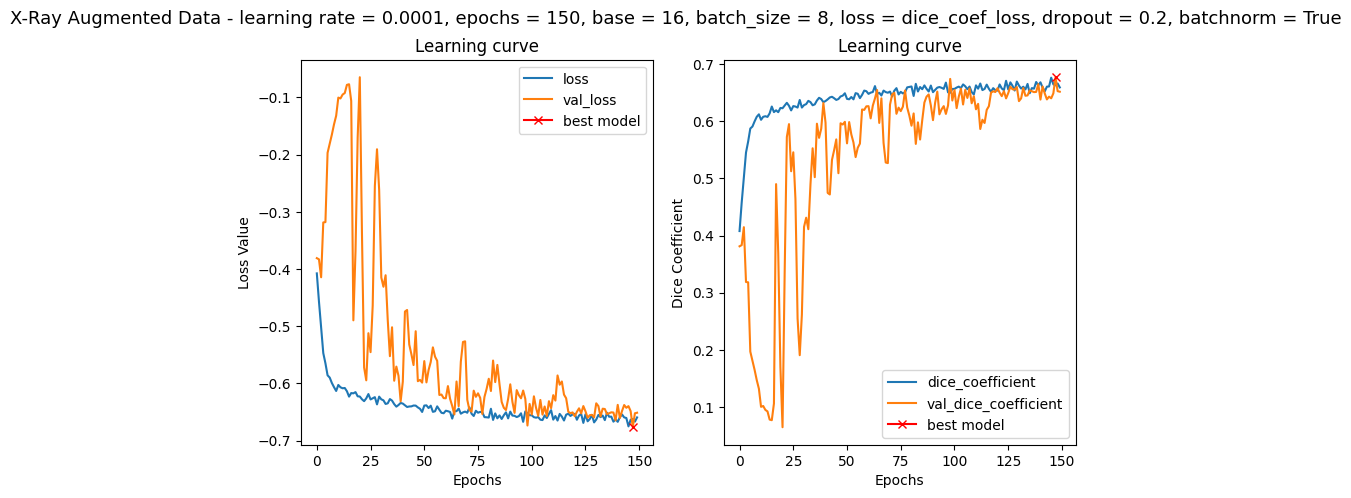

In [43]:
loss_dice_plot(history_dice_drop_aug, "X-Ray Augmented Data - learning rate = {}, epochs = {}, base = {}, batch_size = {}, loss = dice_coef_loss, dropout = {}, batchnorm = {}".format(learning_rate, epochs,
                                                                                                base,batch_size, dropout, batchnorm))